## Linear Regression Part 4: Parameter Optimization by Gradient Decent
Optimizing parameters or "weights" to minimize a Cost Function is one of the fundamental  problems in Machine Learning and AI. In this post we are going to look at two methods of finding these optimal parameters for the cost function of our linear regression model.

The first method will be simple **gradient decent**. This presents core ideas that are essential to understanding how machine learning algorithms work. It is only one of many approaches to optimization but the idea of algorithmically minimizing a function with respect to a set of parameters is fundamental. There are well established optimization methods and programs that would be more appropriate for a "real world" setting. However, if you understand gradient decent you understand a lot!

The second method we will use to find optimal parameters will be **exact solution of the matrix equations**. Linear Regression is solvable using Linear Algebra. Most problems are in general not "solvable" and approximation methods are needed. However, since our cost function is quadratic or "second order" ( a sum of squares ) it will have a linear gradient. [ A gradient is a vector of derivatives ]. **The idea of vectorizing a problem is very powerful**. It can make implementing a program much easier and more efficient. We will do that in the next post.

I am going to start introducing vector notation in this post. Vectors and Matrices can be thought of as arrays (tables) of "things"( symbols, variables, numbers ). It will become more important ... Wikipedia has a good [page on Matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)).

The blob posts for [Part 1](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-1-954/), [Part 2](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-2-963/) and [Part 3](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-3-965/) provide background and motivation.

>**Keep in mind that our simple example of linear regression with 1 feature variable $x$ can be expanded to many variables (dimensions) $x_i$. We could have 10s, 100s or 1000s of feature variables $x_i$ and we would then have similar numbers of parameters to optimize. We could also have complicated non-linear terms for our features $x_i$ like $x^2, x^3, x_1x_2, \ln(x), e^{-x}, 1/x, ...$. As long as the parameters $\{a_0, a_1, a_2, ... a_n \}$ are linear in our cost function we can use linear regression i.e. multi-variate linear regression. It can be very powerful!**  


### Notation review
- **Model function** -- $ h_a(x) = a_0 + a_1x $
- **Cost Function** -- $
 J(a_0, a_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_a(x^{(i)}) - y^{(i)})^2$ $ = \frac{1}{2m} \sum_{i=1}^{m}((a_0 + a_1x^{(i)}) - y^{(i)})^2 $
- $ a = \{a_0, a_1\}$ -- is a set of **parameters** for the function $h_a(x)$ and the **variables** for $J(a_0,a_1)$. We want to find the "best" parameters.
- $x$ -- is our input variable (i.e. the size of a house in square feet ).
- $y$ -- is the output variable (selling price of the house). $h_a(x)$ is an approximation of $y$, $h_a(x) \approx y$.
- **Data representation** -- Our data is represented as pairs of values $ (x^{(i)}, y^{(i)}) $.

- The superscript $(i)$ is referring to the $i^{th}$ data pair in our training set.
- $m$ will be the number of data points.


### What is a Gradient?
Intuitively you know what a gradient is. It is basically the direction of an assent or descent and you can compute it's "size". A small gradient is mostly "flat", a large gradient is "steep". Positive gradient is up, negative gradient is down. If you are driving in the mountains you may see a sign that says something like "15% grade ahead". They are talking about the "steepness" of a hill, a.k.a. relative size of the gradient. 0% is flat, 100% is straight up or down ("100% grade ahead" would mean you are going to drive off a cliff or into a wall, that is an infinite gradient! ... that's a problem in optimization that is often referred to by saying "the gradient blew up"!).

A gradient is a "vector" (an ordered list) of derivatives (partial-derivatives). For a simple 1-d curve a derivative at some point is the "slope" of a line that tells you the rate of change of "steepness" at that point. Our model function is a line and the derivative with respect to $x$ is just $a_1$, the slope of the line. Our cost function, $J$ is a function of 2 variables, $\{a_0, a_1\}$ and is parabolic i.e. 2nd order, has "power" 2. [In the [last post](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-3-965/) we looked at graphs of $J$.]

> **gradient decent optimization is also know as "steepest descents"**


### The Gradient of the Cost Function $J(a_0,a_1)$
Lets derive the gradient of $J$. This will be finding the partial derivatives of $J$ with respect to the variables $a_0, a_1$.

$$ J(a_0, a_1) = \frac{1}{2m} \sum_{i=1}^{m}((a_0 + a_1x^{(i)}) - y^{(i)})^2  $$

The gradient "operation" is given by the symbol "nabla", $\nabla$. The gradient is a column vector of partial derivatives.

$$ \nabla J(a_0,a_1) = \begin{bmatrix} \left(\frac{\partial J}{\partial a_0}\right) \\  \left( \frac{\partial J}{\partial a_1}\right) \end{bmatrix} $$

If you know just a little bit of calculus and realize that the derivative of a sum is a sum of derivatives, then it's easy to see that the partial derivatives are,

$$\frac{\partial J}{\partial a_0} = \frac{1}{m} \sum_{i=1}^{m}((a_0 + a_1x^{(i)}) - y^{(i)}) \ = \frac{1}{m} \sum_{i=1}^{m}(h_a(x^{(i)}) - y^{(i)}) $$

$$\frac{\partial J}{\partial a_1} = \frac{1}{m} \sum_{i=1}^{m}((a_0 + a_1x^{i}) - y^{(i)})x^{(i)} = \frac{1}{m} \sum_{i=1}^{m}(h_a(x^{(i)}) - y^{(i)})x^{(i)} $$


### Gradient Decent Algorithm
The gradient decent algorithm is very simple. Iterate (repeat) k steps in the direction of the negative of the gradient until the cost function stops getting smaller or the size of the gradient becomes zero.

$$ (a_0)_{k+1} \gets (a_0)_k - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_a(x^{(i)}) - y^{(i)}) $$

$$ (a_1)_{k+1} \gets (a_1)_k - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_a(x^{(i)}) - y^{(i)})x^{(i)} $$
$\alpha$ is the "step size" i.e. how far we are going to go in the (-) direction of the gradient.

It looks a little cleaner in vector form,

$$ a = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} $$

$$ a_{k+1} \gets a_k - \alpha \nabla J(a_k)$$

The $k=1$ iteration starts with some guess for the values of $a$. Then you update $a$ and repeat until the cost function $J$ stops getting smaller or the gradient becomes zero. The $\gets$ just means "update from". Note that the parameters $a_0$ and $a_1$ are both updated each iteration.

>*Imagine this: Say you are on a hill and you want to walk down. You can look around from where you are and  find the steepest direction that goes downhill. That's (-) gradient. Take a step   in that direction. That's step size $\alpha$. Then you repeat that from your new location. You will eventually get to the bottom of the hill. -- That's gradient decent.*

#### The step size $\alpha$
**The step size is a parameter of the algorithm**. In Machine Learning understanding what the parameters of the methods you are using do can be as important as understanding the parameters of your model. It's an important part of the craft. If you take very small steps the algorithm may eventually find the minimum but may take a long time. If your steps are too large you may not get to the bottom because you keep stepping over the minimum.

I'll do a simple example problem of finding the minimum of $f(x)=x^2$ with gradient decent so you can see this. 

[ The gradient $\nabla f(x)$ is just the derivative $\frac{df}{dx} = 2x$ so the gradient decent $x$ update is $x_{k+1} \gets x_k - \alpha 2x_k$ ]

First we'll load some Python modules and define the functions above.

In [1]:
import pandas as pd  # data handeling
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

In [2]:
# simple function to demo step size
def f(x) : # A parabola
    f = x**2
    return f
def Df(x) : # The derivative (gradient)
    Df = 2*x
    return Df
def xp1(x,alpha) : # update
    xp1 = x - alpha * Df(x)
    return xp1

**Here is what happens if your step size is too small. It's slow to converge.**

In [3]:
def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-3,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend();

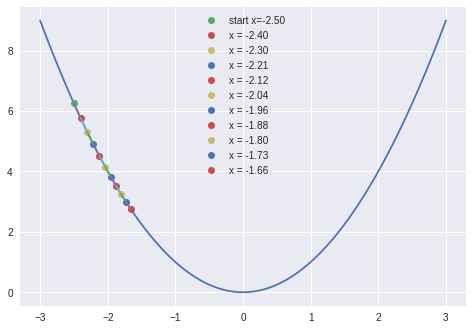

In [5]:
plot_steps( -2.5, 0.02, 10 )

**If the step size is too big it may overshoot the minimum and oscillate without getting to the minimum.**

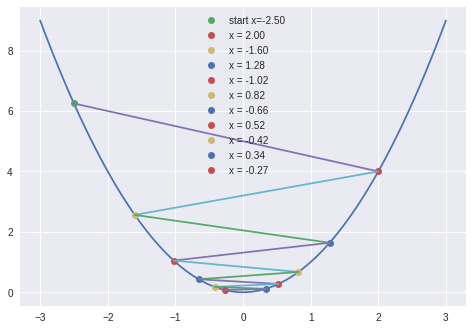

In [6]:
plot_steps( -2.5, 0.9, 10 )

**If it's beyond a critical size it will "blow up" and start going up hill to infinity!**   

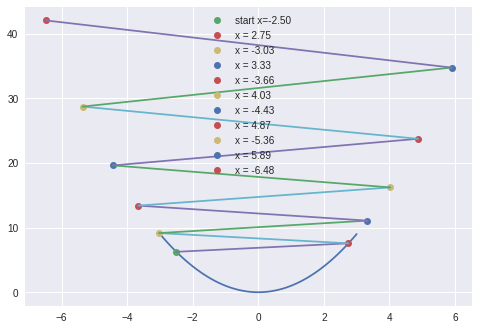

In [11]:
plot_steps( -2.5, 1.05, 10 )

*Here's a quiz for you :-) If you set the step size $\alpha$ to 0.5 how many steps will it take to find the minimum? [Hint: think about where the minimum is i.e. $x=0$ then look at the gradient decent update formula $x_{k+1} \gets x_k - \alpha 2x_k$ -- You could cheat too and download the notebook and make the plot*  

The step size problem is not too bad if you have your data scaled well (preconditioned). More sophisticated optimization algorithms would use something called a "[line search](https://en.wikipedia.org/wiki/Line_search)" to find a good step size.

>**It is important to understand the algorithms you use and know what the algorithm parameters do. If you just blindly use some code you may not get very good results and waste a lot of time.**

## Gradient Decent parameter optimization for 98039 zipcode housing data.
OK, lets do this with our Housing "price" vs "sqft_living" data. We will iterate through gradient decent and look at the results as we go.

First get the data loaded. [It's on my github page with the notebooks](https://github.com/dbkinghorn/blog-jupyter-notebooks)


In [16]:
df_98039 = pd.read_csv("df_98039.csv") 
x = df_98039['sqft_living']
y = df_98039['price']
m = len(x)  # Number of data pairs 

Now define functions for the formulas of the **model**, **cost function**, **gradient** and **parameter updates**.

In [13]:
def h(x,a0,a1) :  # The model function h
    h = a0 + a1*x
    return h

def J(a0, a1, x, y, m):  # The Cost function J
    J = 0
    for i in range(m):
        J += ( h(x[i],a0,a1) - y[i] )**2
    return J/(2.0*m)

def gradJ(a0,a1,x,y,m) :  # The Gradient vector of J, gradJ
    DJa0 = 0; DJa1 = 0;
    for i in range(m):
        DJa0 += (h(x[i],a0,a1) - y[i])
        DJa1 += (h(x[i],a0,a1) - y[i])*x[i]
    gradJ = [DJa0/m, DJa1/m]
    return gradJ
              
def ap1(a0, a1, gJ, alpha) :  # The update to the parameter vector a, ap1 (a plus 1)
                              # gJ is the gradient vector and alpha is the step length
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1

### Feature scaling and data transformations
Our data is 'prices' in the millions and 'sqft' in the thousands. **Those are big numbers**. Remember that the cost function $J(a_0,a_1)$ is a sum of squares over the data set. If we leave the numbers as they are the algorithm will be numerically unstable and could possible "overflow" a.k.a blow up.

>**Optimization has a habit of bring out the worst behavior in functions so we should consider scaling the data before doing the gradient decent.**

As a first try at scaling lets get the data down to similar scales of small numbers. We can divide the price by 1000000 and the sqft by 1000.   

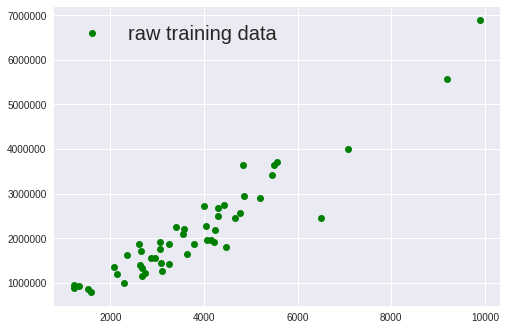

In [21]:
plt.plot(x,y, 'o', color='g', label='raw training data'); plt.legend(fontsize=20);

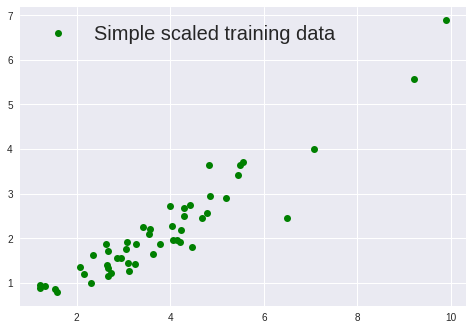

In [23]:
plt.plot(x/1000,y/1000000, 'o', color='g', label='Simple scaled training data'); plt.legend(fontsize=20);

That looks more reasonable. We'll do a gradient decent with this scaling and make a contour plot of the progress. Note, without doing this scaling I couldn't even get the plot to display or the optimization to start!

-0.167211102662 0.61403026067


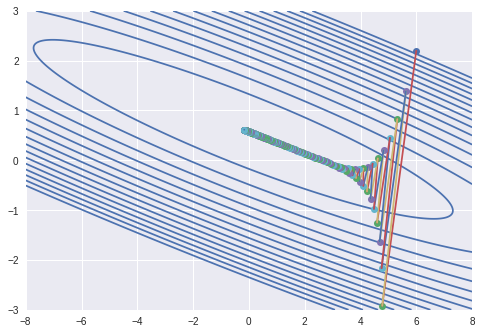

In [28]:
fig, ax = plt.subplots()
# setup the contour axis
p0 = np.linspace(-8,8, 500)
p1 = np.linspace(-3,3, 500)
pa0, pa1 = np.meshgrid(p0, p1)

# plot the Cost function J
ax.contour(pa0,pa1,J(pa0,pa1,x/1000,y/1000000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])

# starting point
a0 = 6; a1 = 2.2
ax.plot(a0,a1, 'o')

# do the gradient decent loop and plot the progress
for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/1000,y/1000000,m), alpha=0.1 )
    #print(a0,a1) # the updated parameters
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
    
# the values of the parameters after the optimization run    
print(a0,a1)

You can see in the plot that the problem is still pretty unstable. The first several iterations are bouncing back and forth across "the valley" (osculating). Once the parameters get into the "bottom of the valley" the **convergence toward the minimum is very slow**. **That's 300 iterations and it's still not at the minimum!** If we ran the gradient decent long enough it would eventually converge to the minimum but we can do much better! Note, if I had the step size larger the problem would osculate very badly and not converge.

The problem is that the function is basically a very long nearly flat valley with very steep sides. If we hadn't done any transformation it would be so bad that it would be almost impossible to even make a contour plot of it and the gradient decent would very difficult to even get started.

**We can do better scaling on the data that will give much improved results**.

### Mean normalization
This transformation subtracts the mean (average) value from the data and then divides it by the "standard deviation" (kind of a spread of the values). We will transform both the price and sqft data.

$$ x' = \frac{x - \overline x }{\sigma_x}, \quad y' = \frac{y - \overline y }{\sigma_y}$$

$ \overline x$ is the mean of $x$, 'sqft_living', and $\sigma_x$ is the standard deviation. Similarly for $y$, the 'price'.

With this transformation, $ x', y'$, the problem can converge in basically 1 or 2 iterations with a step size of 1.

Here's the code for that transformation,

In [30]:
x_mean = x.mean()
x_std = x.std()
xs = (x - x_mean)/x_std

y_mean = y.mean()
y_std = y.std()
ys = (y - y_mean)/y_std

So you can see the progress of the optimization I'll set the step size to 0.5 and let it go for 10 iterations. 

-1 4
-0.5 2.50103457332
-0.25 1.73656220571
-0.125 1.34668129822
-0.0625 1.14784203541
-0.03125 1.04643401137
-0.015625 0.994715919116
-0.0078125 0.968339692064
-0.00390625 0.954887816268
-0.001953125 0.948027359612
-0.0009765625 0.944528526717


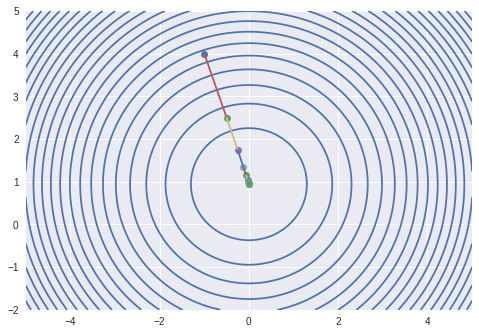

In [40]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) :
    fig, ax = plt.subplots()
    # setup the contour axis
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

    # plot the Cost function J
    ax.contour(pa0,pa1,J(pa0,pa1,xs,ys,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])

    # starting point
    #a0 = -1; a1 = 4
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    # do the gradient decent loop and plot the progress
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,xs,ys,m), alpha=alpha)
        print(a0,a1) # the updated parameters
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
        
plot_steps( startpt=[-1,4], alpha=.5, nsteps=10)

With a step size of 1 It converges very quickly!

-1 4
2.22044604925e-16 1.00206914663
-3.77475828373e-17 0.942110529563
-5.21804821574e-17 0.940911357221


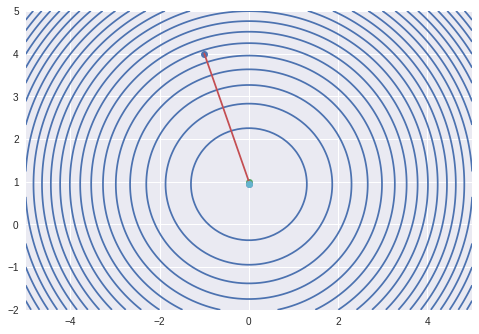

In [41]:
plot_steps( startpt=[-1,4], alpha=1, nsteps=3)

It is converging to $a_0 = 0$ and a_1 = 0.9409. Notice how simple the contours look now!

>**With this mean normalization it is 100 time faster to converge than our first scaling try, and that first attempt wasn't even at the minimum yet!** 

So that you can see how the line of the model function changes during the gradient decent optimization I'll plot a few iterations of the data and model function as the parameters $a_0, a_1$ update.

In [42]:
def plot_model(x,y,a0,a1) :
    fig, ax = plt.subplots()
    ax.plot(x,y, 'o', color='g', label='training data')
    ax.plot(x, h(xs, a0, a1), label='h(x) = %.2f + %.2f * x' %(a0,a1)  )
    plt.legend();

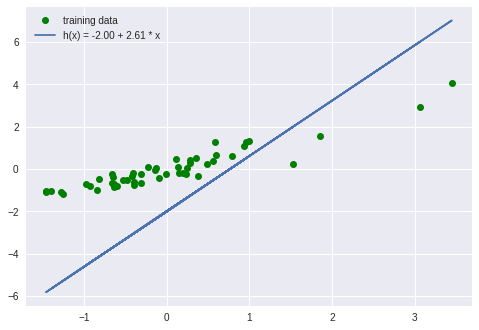

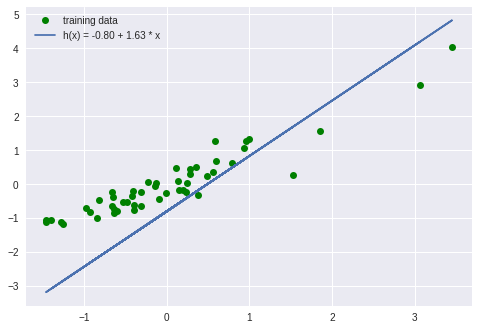

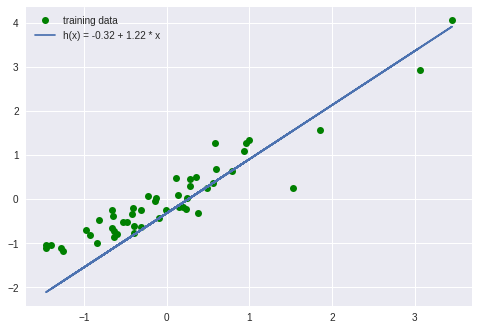

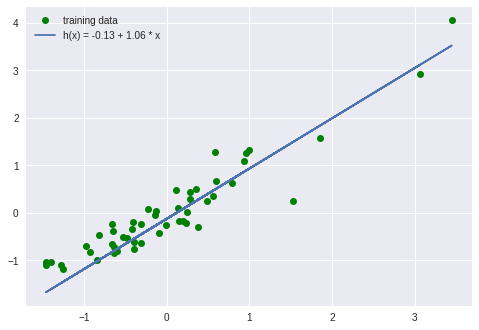

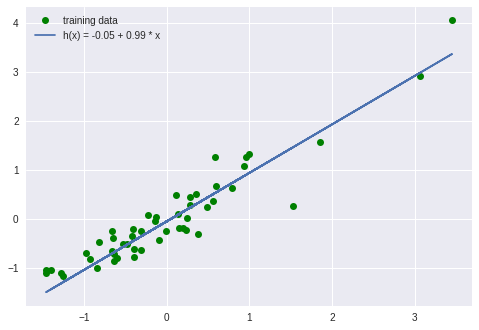

In [43]:
a0 = -5; a1=5
for i in range(5):
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,xs,ys,m), alpha=.6 )
    plot_model(xs,ys,a0,a1)

### Back transformation to original data scales
The data transformation was obviously very helpful to solve the problem but it would be nice to get the "solved" model function back to it's original value scales. For that we will need to do a back transformation. It is a bit tricky since the cost function $J(a_0,a_1)$ has a dependency on $y$.

Near the minimum $h_a(x)$ is approximately equal to $y$.  So in the transformed variables we have,

$$ h'(x') = \frac{h(x)-\overline h(x)}{\sigma_h} = a_0 + a_1 \left( \frac{x - \overline x}{\sigma_x} \right) = y' = \frac{h(x) - \overline y}{\sigma_y}  $$

solving for $h(x)$ gives,

$$ h_a(x) = a_0 \sigma_y + \overline y - a_1 \frac{\sigma_y}{\sigma_x} \overline x + a_1 \frac{\sigma_y}{\sigma_x} x$$

That is just the equation of a line with

$$ b_1 = slope = a_1 \frac{\sigma_y}{\sigma_x} $$
and intercept
$$ b_0 = intercept = a_0 \sigma_y + \overline y - a_1 \frac{\sigma_y}{\sigma_x} \overline x$$ 

Thus, we can define $h_b(x)$ with a back transformation as,

$$ h_b(x) = b_0 + b_1 x$$

This is equivalent to our original model function.

Here's a plot in the original values of our data and the model $h_b(x)$ using the optimized parameters we found, $a_0 = 0, a_1 = 0.9409$ with the mean normalized data.

In [44]:
a0 = 0; a1 = 0.940886884316
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

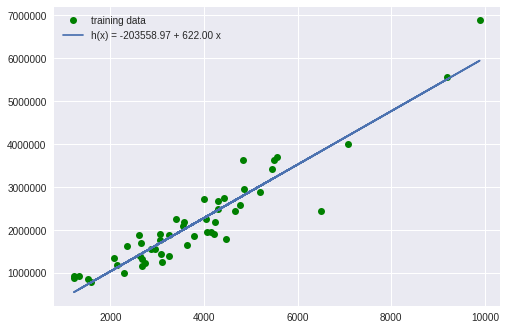

In [46]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
plt.legend();

From that model we can predict that the cost of an 8000 sqft house in zipcode 98039 would be

$$ h_b(8000) = \$4772453.17$$

In [48]:
h(8000,b0,b1)

4772453.173075176

I can't afford it!

In the next post I'll go through a much better and more generalizable form of the linear regression problem in matrix/vector notation. With that I can show the exact solution of the equations. I'll then discuss multi-variate linear regression and linear regression with non-linear feature variables. It's all good stuff. The pace will pick up and **we can move on to Logistic regression, clustering, SVM's and neural networks. It's all surprisingly similar!**

**Happy computing --dbk**